# 1. Data Load: Iris data set

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
df['target'] = iris.target

df['target'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)     target
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[150 rows x 5 columns]


In [ ]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


# 2. EDA

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
import numpy as np

species = np.unique(df['target'])
print(species)

['setosa' 'versicolor' 'virginica']


In [ ]:
seto = df[df['target']==species[0]]
vers = df[df['target']==species[1]]
virg = df[df['target']==species[2]]

In [ ]:
seto.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [ ]:
vers.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [ ]:
virg.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## T-test

- 두 집단 간 평균 차이가 유의한지 검증

In [ ]:
import scipy

- 가설: seto와 vers의 petal length의 평균은 차이가 없다

  - p-value < 0.05면, 가설 기각

In [ ]:
stat, p_value = scipy.stats.ttest_ind(seto['petal length (cm)'], vers['petal length (cm)'])
print('p-value: ',p_value)
if p_value < 0.05:
  print('seto와 vers의 petal length의 평균은 차이가 있다')
else:
  print('seto와 vers의 petal length의 평균은 차이가 있다')

p-value:  5.404910513441677e-62
seto와 vers의 petal length의 평균은 차이가 있다


# 3. Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram

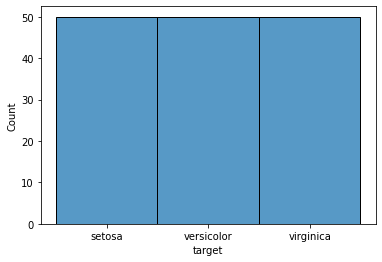

In [ ]:
sns.histplot(df['target'])

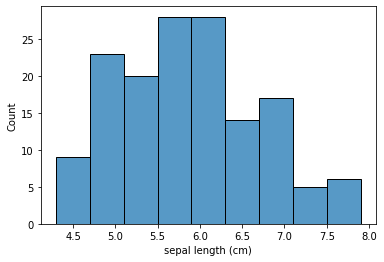

In [ ]:
sns.histplot(df['sepal length (cm)'])

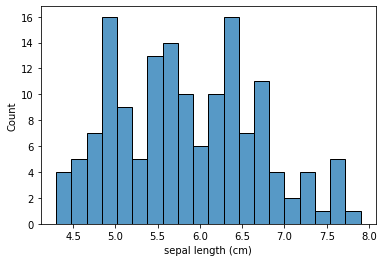

In [ ]:
sns.histplot(df['sepal length (cm)'], bins=20)

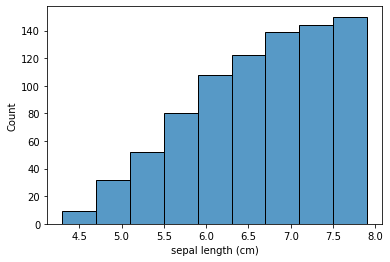

In [ ]:
sns.histplot(df['sepal length (cm)'], cumulative=True)

## Pairplot

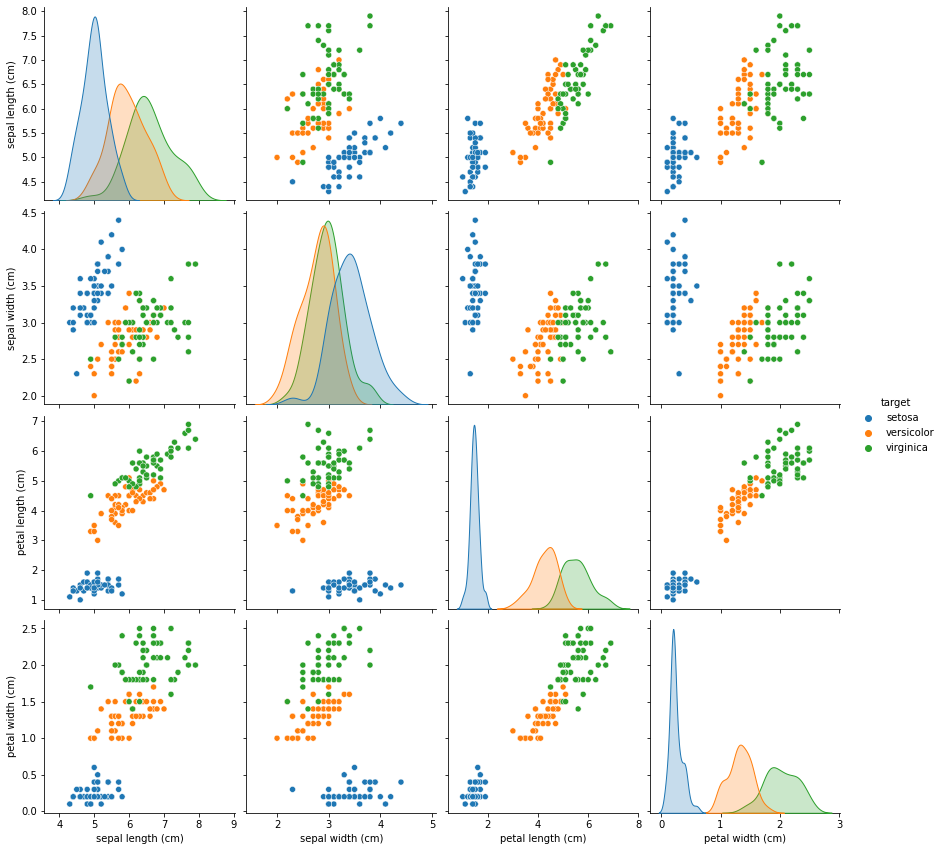

In [ ]:
sns.pairplot(df, hue = "target", height=3)

## Box Plot

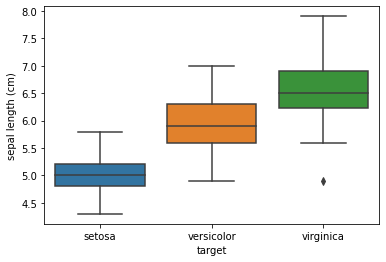

In [ ]:
sns.boxplot(x='target', y='sepal length (cm)', data=df)

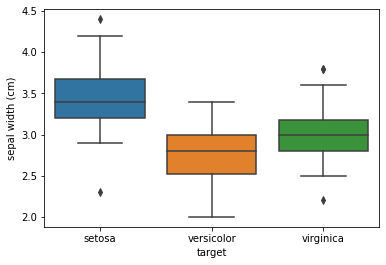

In [ ]:
sns.boxplot(x='target', y='sepal width (cm)', data=df)

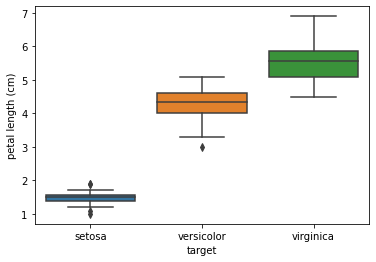

In [ ]:
sns.boxplot(x='target', y='petal length (cm)', data=df)

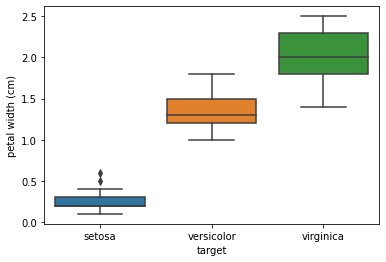

In [ ]:
sns.boxplot(x='target', y='petal width (cm)', data=df)

## Violin Plot

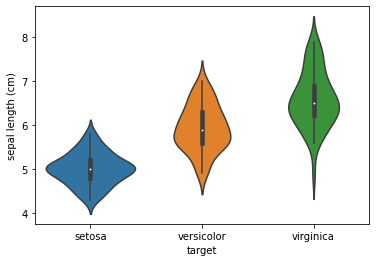

In [ ]:
sns.violinplot(x='target', y='sepal length (cm)', data=df)

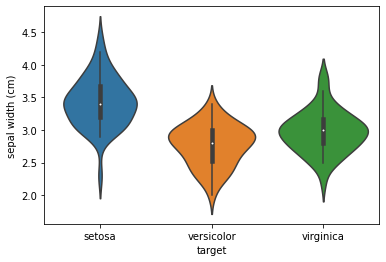

In [ ]:
sns.violinplot(x='target', y='sepal width (cm)', data=df)

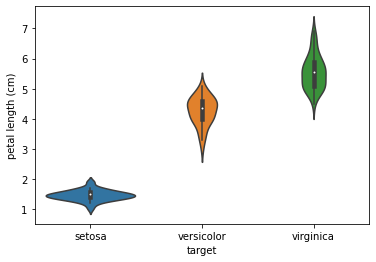

In [ ]:
sns.violinplot(x='target', y='petal length (cm)', data=df)

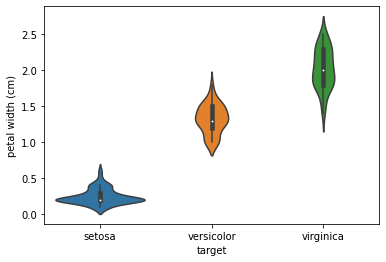

In [ ]:
sns.violinplot(x='target', y='petal width (cm)', data=df)